<a href="https://colab.research.google.com/github/Ganeshwalimbe/DS-Assignment-1/blob/main/DS_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [7]:
data=pd.read_csv('/content/drive/MyDrive/DS assignment shack labs/DS - Assignment Part 1 data set.csv')

In [8]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [14]:
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [10]:
data.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [16]:
data.duplicated().sum()

0

[Text(0.5, 1.0, 'House price range according to house age')]

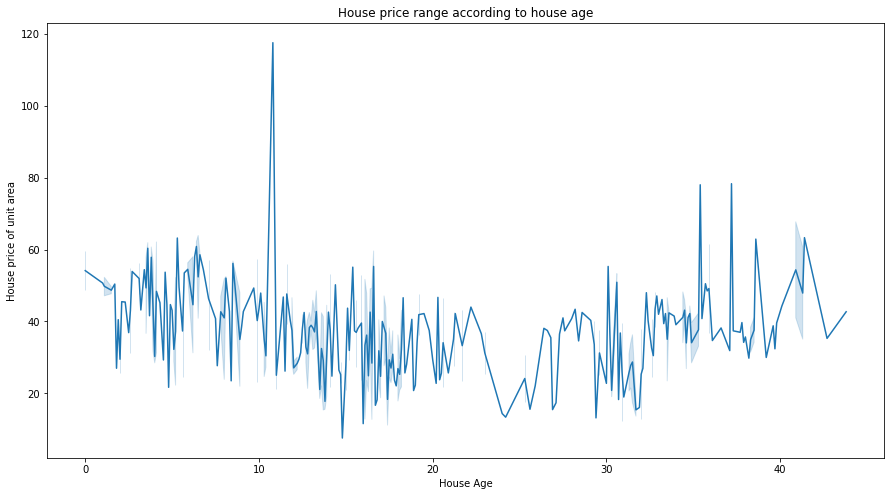

In [23]:
fig,ax=plt.subplots(figsize=(15,8))
sns.lineplot(data=data,x='House Age',y='House price of unit area',ax=ax)
ax.set(title='House price range according to house age')

In [37]:
#performing grouping of variables
Avg_cost_of_house=data.groupby(['Number of bedrooms'])['House price of unit area'].mean().reset_index()
Sorted_avg_cost_of_house=Avg_cost_of_house.sort_values(by='House price of unit area',ascending=False).head(10)
Sorted_avg_cost_of_house

,Number of bedrooms,House price of unit area
2,3,39.433824
0,1,37.741844
1,2,36.782482


[Text(0.5, 1.0, 'average House price according  to  number for bedrooms')]

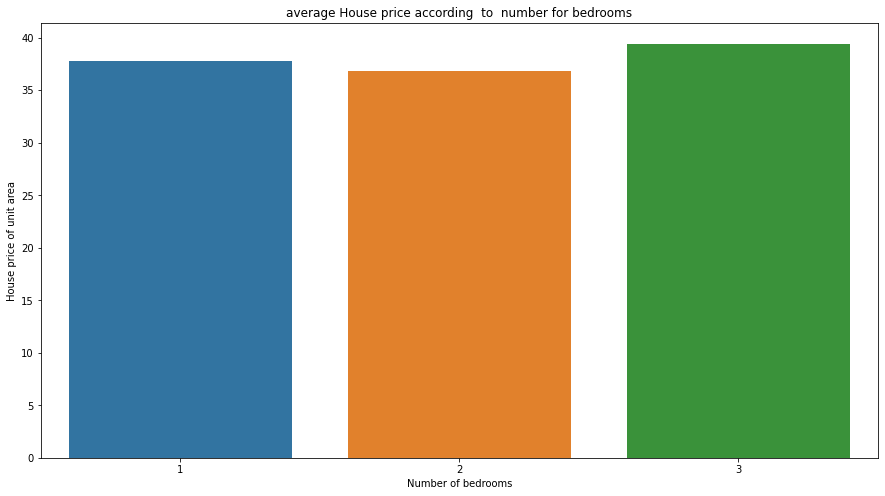

In [31]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=Sorted_avg_cost_of_house,x='Number of bedrooms',y='House price of unit area',ax=ax)
ax.set(title='average House price according  to  number for bedrooms')

In [38]:
Avg_cost_of_house_acc_sq=data.groupby(['House size (sqft)'])['House price of unit area'].mean().reset_index()
Sorted_avg_cost_of_house_acc_sq=Avg_cost_of_house_acc_sq.sort_values(by='House price of unit area',ascending=False).head(10)
Sorted_avg_cost_of_house_acc_sq

,House size (sqft),House price of unit area
292,1373,117.5
221,1187,78.3
15,433,78.0
311,1441,70.1
303,1410,69.7
90,579,67.7
189,1097,63.9
228,1205,63.3
185,1083,63.2
36,472,62.9


[Text(0.5, 1.0, 'House price range according to house age')]

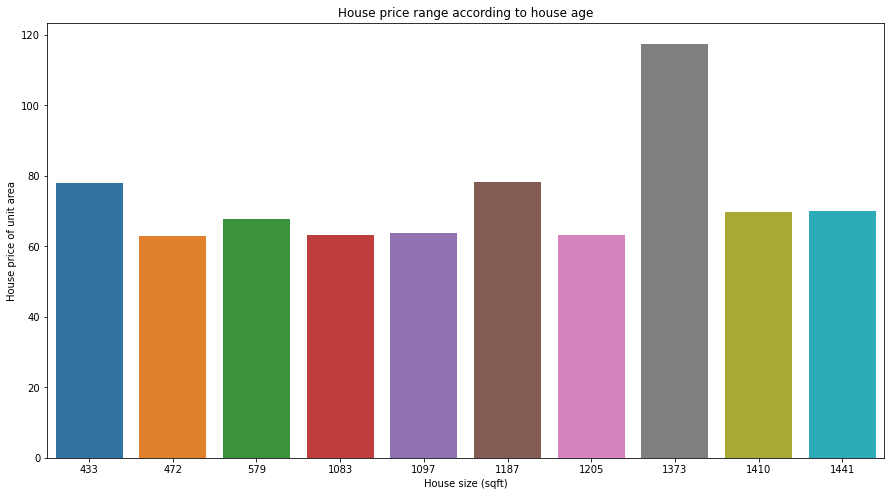

In [39]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=Sorted_avg_cost_of_house_acc_sq,x='House size (sqft)',y='House price of unit area',ax=ax)
ax.set(title='House price range according to house age')

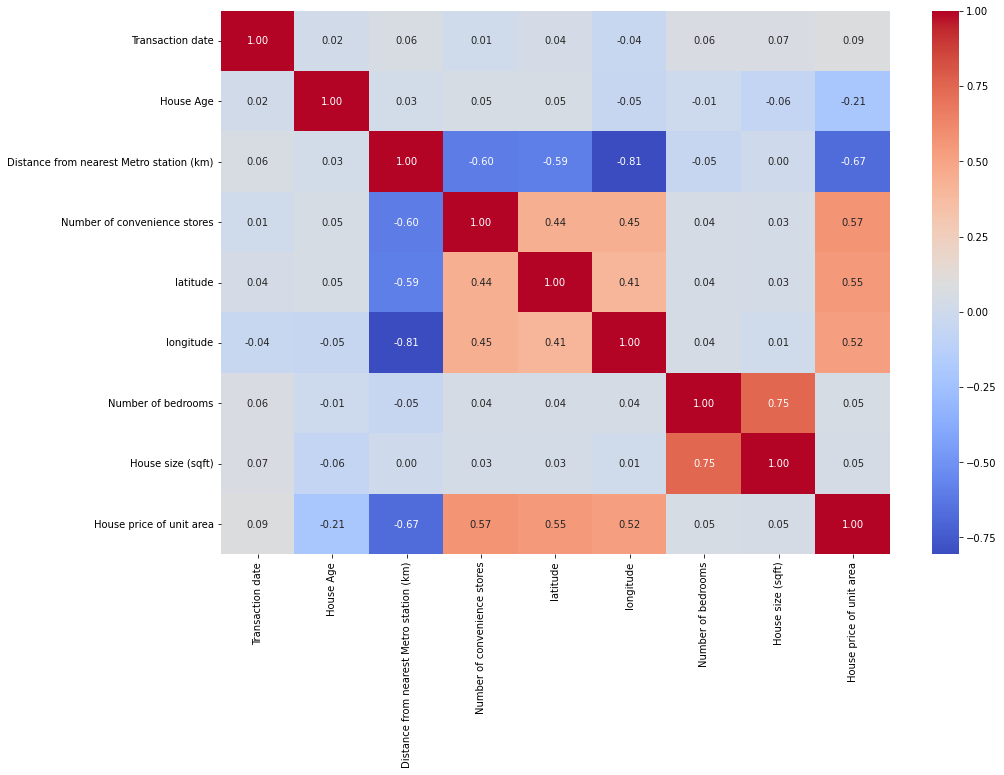

In [40]:
#plotting correlation plot 
corr=data.corr()
fig=plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [43]:
#defining independent and dependent variables
independent_variables=data.drop('House price of unit area',axis=1)
dependent_variable=data['House price of unit area']

In [44]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(independent_variables):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = independent_variables.columns
    vif["VIF"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

    return(vif)

In [45]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Transaction date,4.336878e+07
1,House Age,3.911172e+00
2,Distance from nearest Metro station (km),5.364452e+00
3,Number of convenience stores,5.170731e+00
4,latitude,6.513067e+06
5,longitude,4.413196e+07
6,Number of bedrooms,1.608141e+01
7,House size (sqft),1.903962e+01
8,House price of unit area,2.087962e+01


In [46]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count','longitude']]])

,variables,VIF
0,Transaction date,6.208291e+06
1,House Age,3.863698e+00
2,Distance from nearest Metro station (km),4.208963e+00
3,Number of convenience stores,5.163822e+00
4,latitude,6.211382e+06
5,Number of bedrooms,1.607381e+01
6,House size (sqft),1.903542e+01
7,House price of unit area,1.993051e+01


In [48]:
#performing train test split on independent and dependent variables 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( independent_variables,dependent_variable , test_size = 0.2,random_state =0) 
print(x_train.shape)
print(x_test.shape)

(331, 8)
(83, 8)


In [49]:
#fitting multiple linear regression model 
from sklearn.linear_model import LinearRegression

mlr = LinearRegression().fit(x_train, y_train)

In [50]:
mlr.score(x_train, y_train)

0.564848418957928

In [51]:
#getting predicted values of y train and y test 
y_train_pred = mlr.predict(x_train)
y_test_pred = mlr.predict(x_test)

In [52]:
from sklearn.metrics import r2_score

In [53]:
#Getting r2 score for test set 
r2score=r2_score(y_test, y_test_pred)
r2score

0.6559590333192687

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import math

In [54]:
#defining a fuction to find the evaluation metrics of the model
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('Adj_R2_score is {}'.format(1-(1-r2score)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

In [57]:
#Training_dataset_metrics
print_metrics(y_train, y_train_pred)

MSE is 81.56704226357587
RMSE is 9.031447406898623
R2_score is 0.564848418957928
MAE is 6.244425471303899
Adj_R2_score is 0.6187654152997302


In [58]:
#Test_dataset_metrics
print_metrics(y_test, y_test_pred)

MSE is 59.75957631619199
RMSE is 7.730431832452311
R2_score is 0.6559590333192687
MAE is 5.763432296543103
Adj_R2_score is 0.6187654152997302


In [59]:
# Fitting the Lasso model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
lasso.fit(x_train, y_train)

Lasso(max_iter=3000)

In [60]:
#getting the predicted values of  y_train and y-test 
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)

In [63]:
r2score_lasso=r2_score(y_test, y_pred_test_lasso)

In [61]:
#defining a fuction to find the evaluation metrics of the model
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('Adj_R2_score is {}'.format(1-(1-r2score_lasso)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

In [64]:
# Training dataset metrics
print_metrics(y_train, y_pred_train_lasso)

MSE is 89.76507625050697
RMSE is 9.474443321404534
R2_score is 0.5211127709333001
MAE is 6.599357254998842
Adj_R2_score is 0.5791472625622873


In [65]:
# Testing  dataset metrics
print_metrics(y_test, y_pred_test_lasso)

MSE is 65.9698314111781
RMSE is 8.122181444118207
R2_score is 0.620206066214747
MAE is 6.123262836041687
Adj_R2_score is 0.5791472625622873


In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
### performing Cross validation and hyperparameter tunning 
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.515e+03, tolerance: 4.349e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.291e+03, tolerance: 3.513e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [68]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -90.77041658238004


In [69]:
#getting predicted value of y test
y_pred_lasso = lasso_regressor.predict(x_test)

In [70]:
#getting evaluation metrics of the model 
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 59.78832070575866
RMSE : 7.732290779953807
R2 : 0.6557935494222471
Adjusted R2 :  0.6185820412516791


In [71]:
#importing the packages
from sklearn.ensemble import RandomForestRegressor
#Fitting random forest model 
rf_model = RandomForestRegressor()

rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [72]:
# getting predicted values of y train and y test

y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf = rf_model.predict(x_test)

In [74]:
r2score_rf=r2_score(y_test, y_pred_test_rf)

In [80]:
#fuction for evaluation metrice of models
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('Adj_R2_score is {}'.format(1-(1-r2score_rf)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

In [81]:
#Training data metrics 
print_metrics(y_train, y_pred_train_rf)

MSE is 9.187511410876127
RMSE is 3.0310907955513517
R2_score is 0.9509855941157482
MAE is 1.8306314199395777
Adj_R2_score is 0.7029901872919304


In [82]:
#Testinf data metrics 
print_metrics(y_test, y_pred_test_rf)

MSE is 46.55711019277107
RMSE is 6.823277086032126
R2_score is 0.7319667543854006
MAE is 4.590626506024095
Adj_R2_score is 0.7029901872919304
